In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
gazp = pd.read_csv("data/GAZP.txt")
sber = pd.read_csv("data/SBER.txt")

In [28]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [29]:
res = pd.merge(gazp, sber, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,GAZP,D,20101001,0,160.54,60923751,SBER,D,0,89.09,332429890
1,GAZP,D,20101004,0,161.99,61902787,SBER,D,0,89.88,194032721
2,GAZP,D,20101005,0,162.44,61546943,SBER,D,0,91.97,198775753
3,GAZP,D,20101006,0,163.00,67921495,SBER,D,0,91.20,210406027
4,GAZP,D,20101007,0,162.49,43529081,SBER,D,0,90.40,145137617


In [30]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

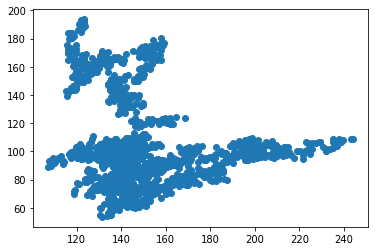

In [31]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [32]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def NAG(self, X_, Y_, rho=0.9, alpha=0.000005, accuracy=0.01, max_steps=5000):

        X, X_test, Y, y_test = train_test_split(X_, Y_, train_size=0.8)
        steps, errors = [], []
        step = 0
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        v0, v1 = 0, 0
        while (dJ > accuracy) and (step<max_steps):

            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            prev_v0 = v0
            v0 = rho * v0 - sum(self.predict(X) - Y) /len(X) * alpha
            db = -prev_v0 * v0 + (1 + rho) * v0
            prev_v1 = v1
            v1 = rho * v1 - sum((self.predict(X) - Y) * X) /len(X) * alpha
            db = -prev_v1 * v1 + (1 + rho) * v1

            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err)
            step += 1
            steps.append(step)
            errors.append(new_err)

            return steps, errors

    def BGD(self, X_, Y_, alpha=0.000005, accuracy=0.01, max_steps=5000):

        X, X_test, Y, y_test = train_test_split(X_, Y_, train_size=0.8)

        steps, errors = [], []
        step = 0
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [33]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 5769.919997525599


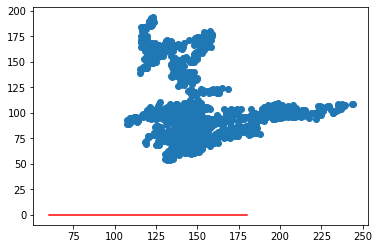

In [34]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 679.2760820450271


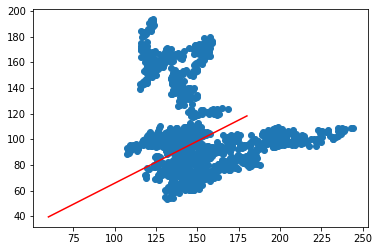

In [35]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

# error after gradient descent: 6734.135540194945

X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 679.2225426856903


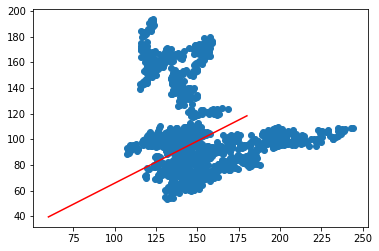

In [36]:
hyp.NAG(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

# error after gradient descent: 6734.135540194945

X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [37]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 679.1014319375541


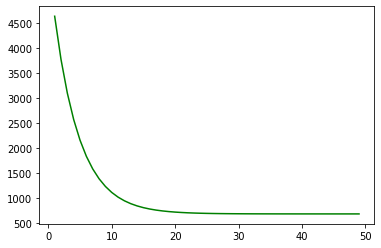

In [38]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
model = LinearRegression().fit(X_train.array.reshape(-1, 1), y_train.array.reshape(-1, 1))
Y0_v2 = model.predict(x.array.reshape(-1, 1))

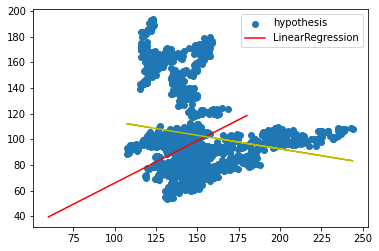

In [40]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.plot(x, Y0_v2, 'y')
plt.legend(['hypothesis', 'LinearRegression'])
plt.show()